In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cars = pd.read_csv('Data/cars93.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             93 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [66]:
cars.drop('Unnamed: 0', axis=1, inplace=True)
# Are there missing values to drop?
for col in cars.columns:
    print(f"{col} = {cars[col].isna().sum()} ({cars[col].dtype})")


Manufacturer = 0 (object)
Model = 0 (object)
Type = 0 (object)
Min.Price = 0 (float64)
Price = 0 (float64)
Max.Price = 0 (float64)
MPG.city = 0 (int64)
MPG.highway = 0 (int64)
AirBags = 0 (object)
DriveTrain = 0 (object)
Cylinders = 0 (object)
EngineSize = 0 (float64)
Horsepower = 0 (int64)
RPM = 0 (int64)
Rev.per.mile = 0 (int64)
Man.trans.avail = 0 (object)
Fuel.tank.capacity = 0 (float64)
Passengers = 0 (int64)
Length = 0 (int64)
Wheelbase = 0 (int64)
Width = 0 (int64)
Turn.circle = 0 (int64)
Rear.seat.room = 2 (float64)
Luggage.room = 11 (float64)
Weight = 0 (int64)
Origin = 0 (object)
Make = 0 (object)


In [67]:
# There are empty valus in the rear.seat.room and luggage.room columns.
# They are both float64 so impute both to be the mean. 
from sklearn.impute import SimpleImputer
import numpy as np

## Impute the numerical values to the mean
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
for name, values in cars.select_dtypes('float64').iteritems():
    cars[name] = imp_mean.fit_transform(
        cars[name].to_numpy().reshape(-1, 1))
for col in cars.columns:
    print(f"{col} = {cars[col].isna().sum()} ({cars[col].dtype})")


Manufacturer = 0 (object)
Model = 0 (object)
Type = 0 (object)
Min.Price = 0 (float64)
Price = 0 (float64)
Max.Price = 0 (float64)
MPG.city = 0 (int64)
MPG.highway = 0 (int64)
AirBags = 0 (object)
DriveTrain = 0 (object)
Cylinders = 0 (object)
EngineSize = 0 (float64)
Horsepower = 0 (int64)
RPM = 0 (int64)
Rev.per.mile = 0 (int64)
Man.trans.avail = 0 (object)
Fuel.tank.capacity = 0 (float64)
Passengers = 0 (int64)
Length = 0 (int64)
Wheelbase = 0 (int64)
Width = 0 (int64)
Turn.circle = 0 (int64)
Rear.seat.room = 0 (float64)
Luggage.room = 0 (float64)
Weight = 0 (int64)
Origin = 0 (object)
Make = 0 (object)


In [68]:
# seperate the dependent variable out
X = cars.drop('MPG.highway', axis=1)
print(X.shape)

y = cars['MPG.highway']
print(y.head())


(93, 26)
0    31
1    25
2    26
3    26
4    30
Name: MPG.highway, dtype: int64


In [69]:
# Create dummy values for categorical data
X = pd.get_dummies(X, drop_first=True)
print(X.shape)
X.head()


(93, 248)


,Min.Price,Price,Max.Price,MPG.city,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,...,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Previa,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Eurovan,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,12.9,15.9,18.8,25,1.8,140,6300,2890,13.2,5,...,0,0,0,0,0,0,0,0,0,0
1,29.2,33.9,38.7,18,3.2,200,5500,2335,18.0,5,...,0,0,0,0,0,0,0,0,0,0
2,25.9,29.1,32.3,20,2.8,172,5500,2280,16.9,5,...,0,0,0,0,0,0,0,0,0,0
3,30.8,37.7,44.6,19,2.8,172,5500,2535,21.1,6,...,0,0,0,0,0,0,0,0,0,0
4,23.7,30.0,36.2,22,3.5,208,5700,2545,21.1,4,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Create testing and training sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)


In [71]:
# Train the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [81]:
predictions_test = reg.predict(X_test)
residuals_test = predictions_test - y_test

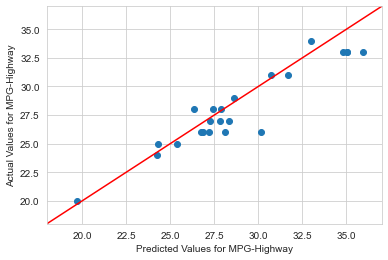

In [96]:
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='red')
ax.scatter(x=predictions_test, y=y_test, )
ax.set_xlim(18, 37)
ax.set_ylim(18, 37)
ax.set_xlabel('Predicted Values for MPG-Highway')
ax.set_ylabel('Actual Values for MPG-Highway')
plt.show()


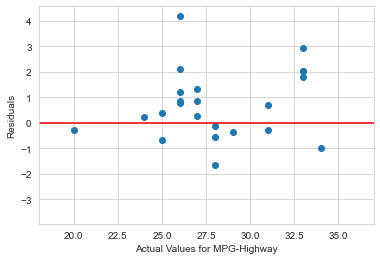

In [98]:
# Display the residuals versus the actual values
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax.scatter(x=y_test, y=residuals_test)
ax.hlines(0, 18, 37, color='red')
ax.set_xlim(18, 37)
""" ax.set_ylim(18, 37) """
ax.set_xlabel('Actual Values for MPG-Highway')
ax.set_ylabel('Residuals')
plt.show()


In [79]:
# Check the model fit
print(f"R2 = {round(reg.score(X, y),4)}")

R2 = 0.9749


In [100]:
# Get the model coefficients
coeffs = reg.coef_
print(len(coeffs))
columns = X_train.columns
string = f"y = {round(reg.intercept_,4)}"
for idx, coeff in enumerate(coeffs):
    string += f" + {round(coeff,4)}*{columns[idx]}"
print(string)
print(f"There are {(coeffs == 0).sum()} coefficients that equal zero")


248
y = 8.9193 + 0.0142*Min.Price + -0.0979*Price + 0.0635*Max.Price + 0.83*MPG.city + 0.3832*EngineSize + -0.0029*Horsepower + 0.0002*RPM + -0.0003*Rev.per.mile + -0.105*Fuel.tank.capacity + -0.5371*Passengers + 0.0536*Length + 0.0292*Wheelbase + 0.0146*Width + -0.0661*Turn.circle + -0.1228*Rear.seat.room + 0.1697*Luggage.room + -0.0015*Weight + 0.1457*Manufacturer_Audi + 0.6004*Manufacturer_BMW + 0.4976*Manufacturer_Buick + 0.558*Manufacturer_Cadillac + 0.6196*Manufacturer_Chevrolet + -0.0367*Manufacturer_Chrylser + -0.6994*Manufacturer_Chrysler + -0.4097*Manufacturer_Dodge + -0.6773*Manufacturer_Eagle + -0.6177*Manufacturer_Ford + 0.3727*Manufacturer_Geo + -0.0109*Manufacturer_Honda + 0.0047*Manufacturer_Hyundai + -0.3501*Manufacturer_Infiniti + -0.447*Manufacturer_Lexus + 0.319*Manufacturer_Lincoln + 0.8252*Manufacturer_Mazda + 0.2953*Manufacturer_Mercedes-Benz + -0.1979*Manufacturer_Mercury + -0.1972*Manufacturer_Mitsubishi + -0.4528*Manufacturer_Nissan + -0.1318*Manufacturer_Olds